# Week 3 of ml-zoomcamp

This week we will explore Logistic Regression. This is the homework assignment of the Logistic Regression section

In [1]:
#importing the required packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing_df = pd.read_csv('./housing.csv')

### Data preparation
1. Select only the features from above and fill in the missing values with 0.
2. Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
3. Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
4. Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [3]:
housing_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [4]:
#handling missing value

housing_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
housing_df = housing_df.fillna(0)

In [6]:
housing_df['rooms_per_household'] = housing_df['total_rooms']/housing_df['households']
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms']/housing_df['total_rooms']
housing_df['population_per_household'] = housing_df['population']/housing_df['households']


##### Question 1
What is the most frequent observation (mode) for the column ocean_proximity?

In [7]:
housing_df.ocean_proximity.mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

Split the data
1. Split your data in train/val/test sets, with 60%/20%/20% distribution.
2. Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
3. Make sure that the target value (median_house_value) is not in your dataframe.

In [8]:
housing_fulltrain, housing_test = train_test_split(housing_df, test_size=0.2, random_state=42)
housing_train, housing_val = train_test_split(housing_fulltrain, test_size=0.25, random_state=42)


housing_train.shape, housing_val.shape, housing_test.shape

((12384, 13), (4128, 13), (4128, 13))

##### Question 2
1. Create the correlation matrix for the numerical features of your train dataset.
2. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
3. What are the two features that have the biggest correlation in this dataset?

<AxesSubplot:>

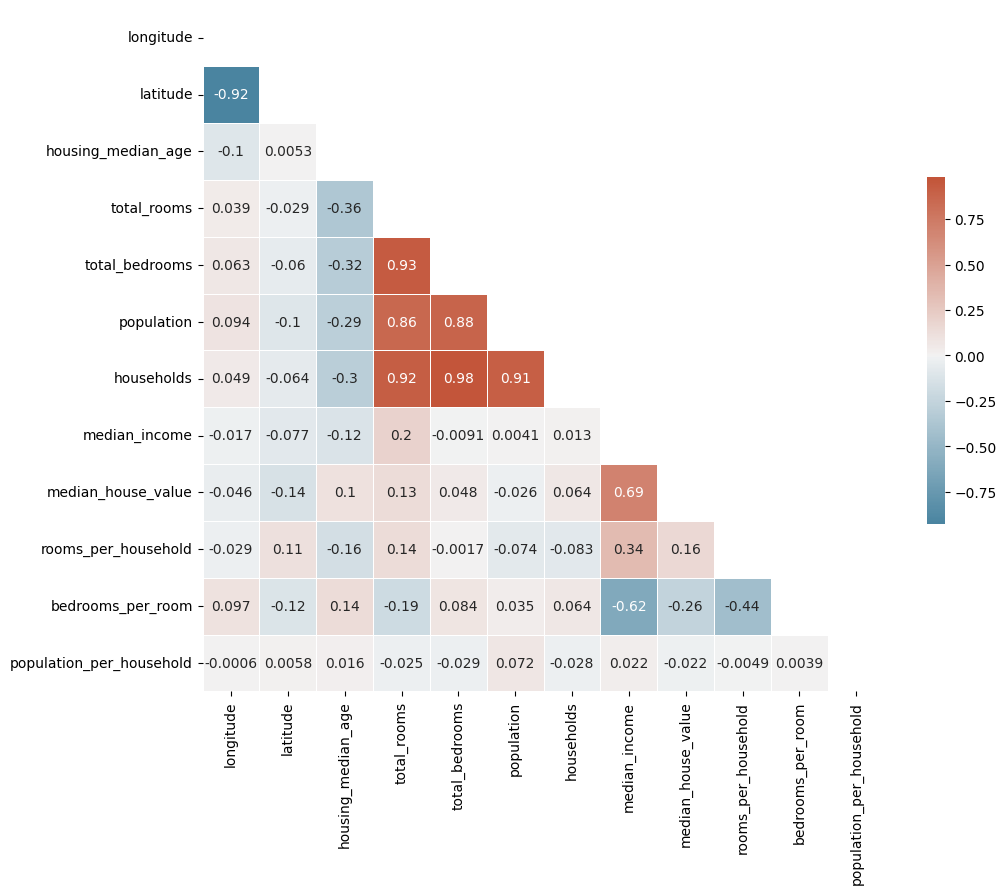

In [9]:
corr_matrix = housing_fulltrain.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Make median_house_value binary
We need to turn the median_house_value variable from numeric into binary.
Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [10]:
def create_binary_column(col):
    return (col>col.median()).astype(int)
    
housing_test['above_average'] = create_binary_column(housing_test['median_house_value'])
housing_train['above_average'] = create_binary_column(housing_train['median_house_value'])
housing_val['above_average'] = create_binary_column(housing_val['median_house_value'])

    

In [11]:
housing_train['above_average']

17244    1
8817     1
19686    0
3545     1
17019    1
        ..
5606     0
16339    0
14965    1
11117    0
8472     1
Name: above_average, Length: 12384, dtype: int32

##### Question 3
Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
What is the value of mutual information?
Round it to 2 decimal digits using round(score, 2)

In [12]:
round(mutual_info_score(housing_train.ocean_proximity, housing_train.above_average),2)

0.12

#### Question 4

1. Now let's train a logistic regression
2. Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
3. Fit the model on the training dataset.
4. To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
5. Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [13]:
def creating_X_dict_for_vectorizer(df):
    dicts = df.drop(['above_average', 'median_house_value'], axis = 1).to_dict(orient='records')
    return dicts


In [14]:
train_dict = creating_X_dict_for_vectorizer(housing_train)
val_dict = creating_X_dict_for_vectorizer(housing_val)

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)


X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)


y_train = housing_train['above_average']
y_val = housing_val['above_average']

In [15]:
#Train Logistic Regression

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [16]:
model.coef_[0].round(3)

array([ 0.33 ,  0.004,  0.027,  0.092,  0.075,  1.248,  0.676, -1.911,
        0.027,  0.378,  0.716, -0.002,  0.009,  0.028,  0.002, -0.   ])

In [17]:
y_pred = model.predict(X_val)

In [18]:
model_accuracy_full = accuracy_score(y_val, y_pred, normalize=True)

In [19]:
model_accuracy_full

0.8313953488372093

In [20]:
X_train_df = pd.DataFrame(X_train, columns=dv.get_feature_names_out())
X_val_df = pd.DataFrame(X_val, columns=dv.get_feature_names_out())

In [21]:
def train_logistic_regression_eliminating_columns(x_train_df, x_val_df, y_train, y_val):
    
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(x_train_df, y_train)
    y_pred = model.predict(x_val_df)
    model_accuracy = accuracy_score(y_val, y_pred, normalize=True)
    return model_accuracy
    
accuracy_summary_dict = {}
for column in X_train_df.columns:
    X_train_df_new = X_train_df.drop(column, axis=1)
    X_val_df_new = X_val_df.drop(column, axis=1)
    model_accuracy = train_logistic_regression_eliminating_columns(X_train_df_new, X_val_df_new, y_train, y_val)
    accuracy_drop = model_accuracy_full-model_accuracy
    accuracy_summary_dict[f'Removed - {column}']=accuracy_drop
    

In [22]:
accuracy_summary_dict

{'Removed - bedrooms_per_room': 0.0,
 'Removed - households': 0.002664728682170603,
 'Removed - housing_median_age': 0.0014534883720930258,
 'Removed - latitude': -0.003633720930232509,
 'Removed - longitude': 0.0,
 'Removed - median_income': 0.05547480620155043,
 'Removed - ocean_proximity=<1H OCEAN': -0.0016957364341084746,
 'Removed - ocean_proximity=INLAND': -0.0014534883720930258,
 'Removed - ocean_proximity=ISLAND': -0.0002422480620154488,
 'Removed - ocean_proximity=NEAR BAY': -0.0009689922480620172,
 'Removed - ocean_proximity=NEAR OCEAN': -0.0002422480620154488,
 'Removed - population': 0.004602713178294637,
 'Removed - population_per_household': -0.0009689922480620172,
 'Removed - rooms_per_household': 0.0004844961240310086,
 'Removed - total_bedrooms': -0.0007267441860464574,
 'Removed - total_rooms': -0.0043604651162790775}

#### Question 6
For this question, we'll see how to use a linear regression model from Scikit-Learn
We'll need to use the original column 'median_house_value'. 
1. Apply the logarithmic transformation to this column.
2. Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
3. This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
4. Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.


In [23]:
#new y columns

y_train = np.log1p(housing_train.median_house_value)
y_val = np.log1p(housing_val.median_house_value)
y_test = np.log1p(housing_test.median_house_value)

In [24]:
#Training the regression model
a = [0, 0.01, 0.1, 1, 10]
rmse_dict = {}
for alpha in a:
    model_reg =  Ridge(alpha=alpha, solver="sag", random_state=42)
    model_reg.fit(X_train, y_train)
    y_pred = model_reg.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred)).round(3)
    rmse_dict[alpha]=rmse

In [25]:
rmse_dict

{0: 0.524, 0.01: 0.524, 0.1: 0.524, 1: 0.524, 10: 0.524}